In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [19]:
df = load_iris()
x = df.data
y = df.target
names = df.target_names

In [20]:
df = pd.DataFrame(data=np.c_[x,y], columns=df.feature_names+['target'])
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


In [22]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=99)

In [26]:
max_k = int(np.sqrt(len(x_train)))
k_val = [val for val in range(1, max_k+1) if val%3 != 0 and val%2 != 0]
accuracies = []

In [27]:
for k in k_val:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc = accuracy_score(y_pred, y_test)
    accuracies.append(acc)

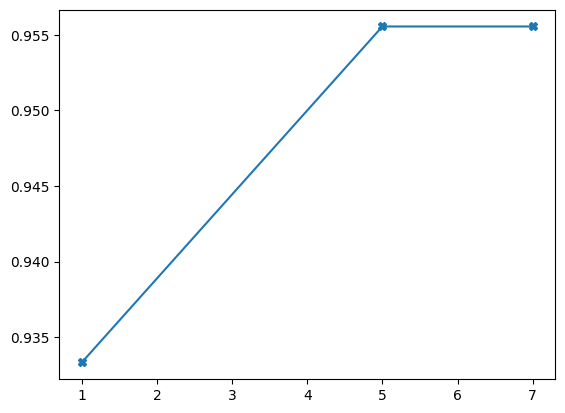

In [29]:
plt.plot(k_val, accuracies, marker='X')